In [2]:
%run Jansen_And_Rit.py
%run OptimiseFunctions.py
x1, x2, x3, V_T_sim = run_jansen_and_rit(10,10,94,101,35,10,0.367,1,0.66,0,0.5)

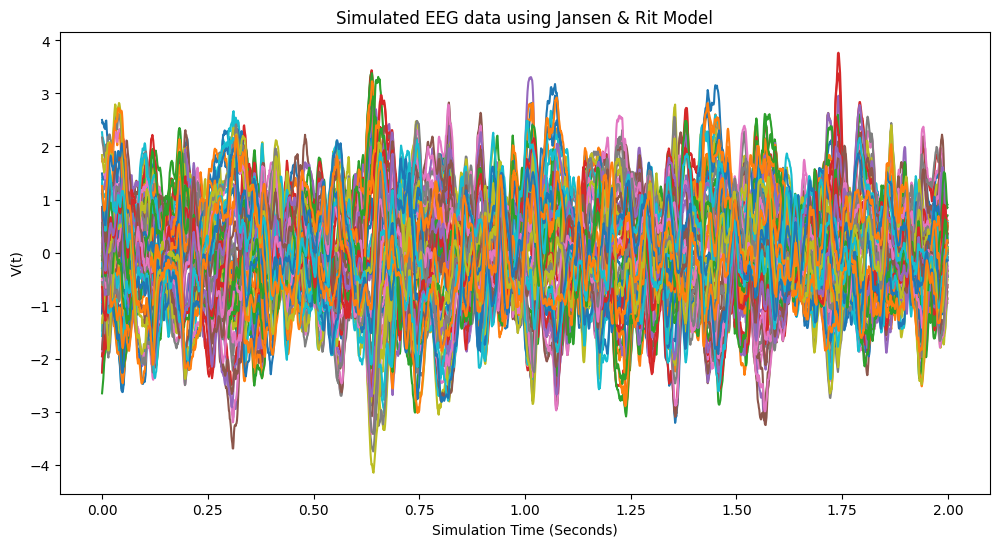

In [3]:
%matplotlib inline
# Plot EEG Results #################################################################
fig = plt.figure(figsize=(12, 6)) 

time_seconds = np.arange(V_T_sim.shape[0]) / eeg_freq

# Plot V_T for each node
for node in range(62):
    plt.plot(time_seconds, V_T_sim[:, node], label=f'Node {node+1}')

plt.xlabel('Simulation Time (Seconds)')
plt.ylabel('V(t)')
plt.title('Simulated EEG data using Jansen & Rit Model')

# Add legend to the right of the plot
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
plt.close(fig)

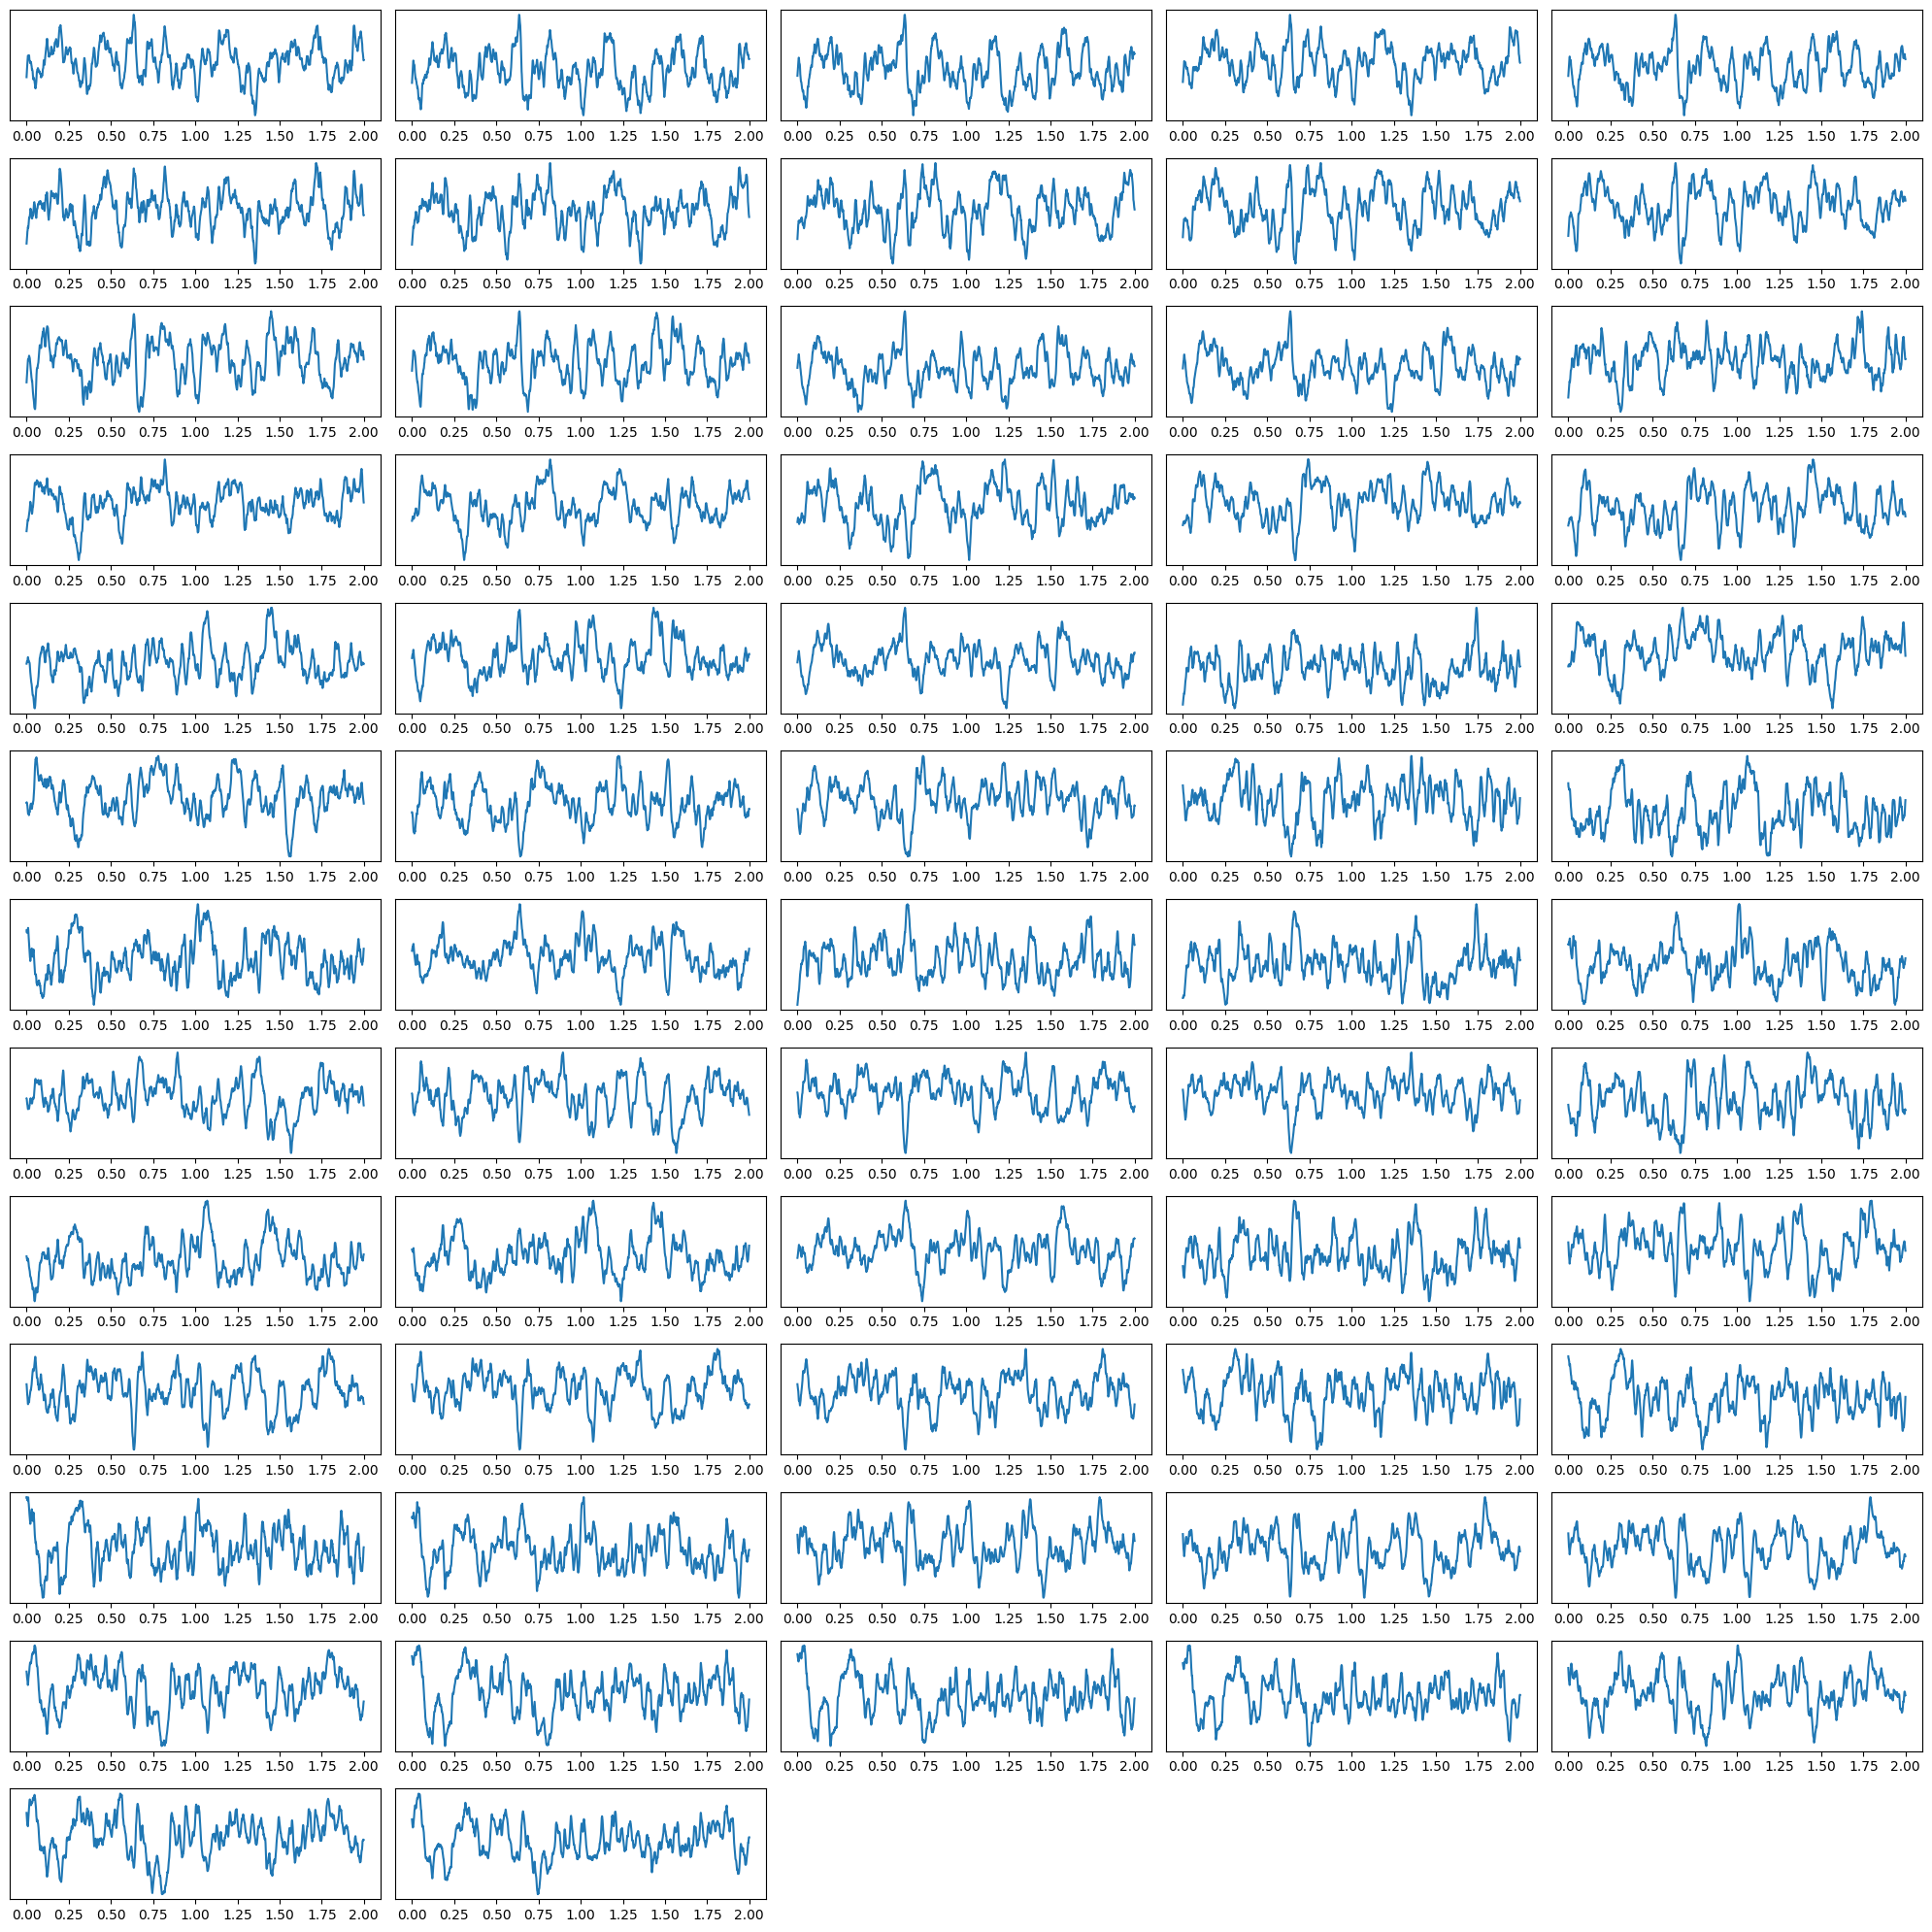

In [5]:
fig, ax = plt.subplots(nrows=13, ncols=5, figsize=(20, 20))

node = 0
for row in ax:
    for col in row:
        if node >= 62:
            col.axis('off')
            continue
        col.plot(time_seconds,  V_T_sim[:, node])
        col.tick_params(left=False, labelleft=False)
        node += 1 
    plt.tight_layout()

plt.show()
plt.close(fig)

In [ ]:
# Interactive plot with mne ################################################################

ch_names = ['CH{}'.format(i) for i in range(62)]
# Create info dictionary

fake_info = mne.create_info(ch_names, sfreq=eeg_freq)
raw = mne.io.RawArray(data=V_T_sim.T, info=fake_info)

fig = raw.plot(scalings=10)